# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting6 = pd.read_csv("Results6/countingSort-PC6.csv")
dfCounting6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting16 = pd.read_csv("Results16/countingSort-PC16.csv")
dfCounting16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting21 = pd.read_csv("Results21/countingSort-PC21.csv")
dfCounting21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting23 = pd.read_csv("Results23/countingSort-PC23.csv")
dfCounting23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV6 = pd.read_csv("Results6/readCSV-PC6.csv")
dfReadCSV6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV16 = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
# 
dfReadCSV21 = pd.read_csv("Results21/readCSV-PC21.csv")
dfReadCSV21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV23 = pd.read_csv("Results23/readCSV-PC23.csv")
dfReadCSV23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

## Counting sort

In [25]:
def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

dfC6 = removeNonsense(dfCounting6)
dfC16 = removeNonsense(dfCounting16)
dfC21 = removeNonsense(dfCounting21)
dfC23 = removeNonsense(dfCounting23)


dfR6 = removeNonsense(dfReadCSV6)
dfR16 = removeNonsense(dfReadCSV16)
dfR21 = removeNonsense(dfReadCSV21)
dfR23 = removeNonsense(dfReadCSV23)


In [26]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l

makeinputColumn(dfC6)
makeinputColumn(dfC16)
makeinputColumn(dfC21)
makeinputColumn(dfC23)
print(dfC16)

def makeinputColumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[1].lower())
    df["Input case"] = l
    
makeinputColumn_readCSV(dfR6)
makeinputColumn_readCSV(dfR16)
makeinputColumn_readCSV(dfR21)
makeinputColumn_readCSV(dfR23)


             Test name    PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
0      random1-25000-1   5.558350  4.756775            0.380188           72   
1      random1-25000-1   5.314636  4.515320            0.365112           72   
2      random1-25000-1   5.447754  4.662659            0.370605           72   
3      random1-25000-1   5.188416  4.428955            0.356323           72   
4      random1-25000-1   5.204102  4.443542            0.355286           72   
...                ...        ...       ...     ...         ...          ...   
20794  worst-1000000-1  10.212769  8.609131            0.739380           60   
20795  worst-1000000-1  10.300110  8.668518            0.757263           60   
20796  worst-1000000-1  10.474915  8.800232            0.767151           61   
20797  worst-1000000-1  10.169312  8.535522            0.756592           60   
20798  worst-1000000-1  10.342163  8.699158            0.762634           60   

       Time (ms) Input case  
0        

In [27]:
def makeSizecolumn(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l
makeSizecolumn(dfC6)
makeSizecolumn(dfC16)
makeSizecolumn(dfC21)
makeSizecolumn(dfC23)

def makeSizecolumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[-1]))

    df["Size"] = l

makeSizecolumn_readCSV(dfR6)
makeSizecolumn_readCSV(dfR16)
makeSizecolumn_readCSV(dfR21)
makeSizecolumn_readCSV(dfR23)

In [28]:
print(f"C6: {len(dfC6)}")
print(f"C16: {len(dfC16)}")
print(f"C21: {len(dfC21)}")
print(f"C23: {len(dfC23)}")
print(f"R6: {len(dfR6)}")
print(f"R16: {len(dfR16)}")
print(f"R21: {len(dfR21)}")
print(f"R23: {len(dfR23)}")

C6: 20799
C16: 20799
C21: 20799
C23: 20799
R6: 41599
R16: 41599
R21: 41599
R23: 41599


### remove outliers

In [29]:
def remove_outliers(df, type, size, col):
    q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR
    print(col)
    print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
    print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
    #print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df[col] >= LF]
    return df

In [30]:
def remove_outliers_for_pc(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    col = ["CPU (J)", "Memory (J)", "Temperature","Time (ms)", "PKG (J)"]
    for case in c:
        for size in s:
            for column in col:
                df = remove_outliers(df, case, size, column)
remove_outliers_for_pc(dfC6)
remove_outliers_for_pc(dfC16)
remove_outliers_for_pc(dfC21)
remove_outliers_for_pc(dfC23)
remove_outliers_for_pc(dfR6)
remove_outliers_for_pc(dfR16)
remove_outliers_for_pc(dfR21)
remove_outliers_for_pc(dfR23)

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])


CPU (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
          Test name   PKG (J)  CPU (J) GPU (J)  Memory (J)  Temperature  \
10517  best-25000-1  1.521667  1.22522            0.114502           75   

       Time (ms) Input case   Size  
10517    307.558       best  25000  


C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])


Memory (J)
          Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
10416  best-25000-1  1.638916  1.348694            0.123596           73   
10632  best-25000-1  1.625244  1.314392            0.125793           75   
10770  best-25000-1  1.638489  1.341553            0.123596           76   

       Time (ms) Input case   Size  
10416    284.125       best  25000  
10632    310.167       best  25000  
10770    294.544       best  25000  
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
          Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
10403  best-25000-1  1.650024  1.386047            0.1

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]


Memory (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J),

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

CPU (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
          Test name  PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
10649  best-25000-1  1.52533  1.235901            0.110107           63   

       Time (ms) Input case   Size  
10649    270.192       best  25000  
Memory (J)
          Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
10403  best-25000-1  1.755127  1.432678            0.127747           62   
10412  best-25000-1  1.660522  1.321960            0.132568           62   
10459  best-25000-1  1.744019  1.386841            0.131104           62   
10603  best-25000-1  1.856812  1.524048            0.127869           63   
10613  best-25000-1  1.728638  1.403564            0.129822           63   
10650  best-25000-1  1.742126  1.416077            0.132202           63   
10791  best-25000-1  1.774902  1.450073            0.129150           64   

       Time (ms) In

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]



Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
CPU (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), M

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

CPU (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Memory (J)
          Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
10427  best-25000-1  1.700012  1.383789            0.134094           59   
10456  best-25000-1  1.685486  1.378357            0.128113           59   
10486  best-25000-1  1.767578  1.441284            0.129822           60   
10540  best-25000-1  1.800659  1.484436            0.128601           61   
10743  best-25000-1  1.837463  1.512207            0.131531           61   

       Time (ms) Input case   Size  
10427    303.069       best  25000  
10456    285.625       best  25000  
10486    297.549       best  25000  
10540    297.319       best  25000  
10743    298.157       best  25000  
Empty DataFrame
Columns: [Test name, PKG (J), 

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]



Memory (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J)

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

Memory (J)
          Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
10406  best-25000-1  1.766846  1.424622            0.189575           68   
10415  best-25000-1  1.737427  1.386353            0.189941           66   
10416  best-25000-1  1.743164  1.418152            0.181824           66   
10426  best-25000-1  1.762512  1.439697            0.184692           66   
10427  best-25000-1  1.768799  1.410339            0.188782           66   
10449  best-25000-1  1.781677  1.404114            0.189148           66   
10522  best-25000-1  1.787781  1.419617            0.199890           67   
10550  best-25000-1  1.760986  1.427490            0.185852           68   
10598  best-25000-1  1.733154  1.403625            0.179626           67   
10633  best-25000-1  1.772034  1.453369            0.182373           67   
10650  best-25000-1  1.800537  1.494690            0.179993           68   
10706  best-25000-1  1.786621  1.441467            0.187012           68   
1

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]



Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])


Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Memory (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J),

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]



Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
CPU (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), M

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Memory (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J),

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])


Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []


C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]


Memory (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J),

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])


Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []


C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\1338546912.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]


Memory (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Temperature
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Time (ms)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
PKG (J)
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J), Memory (J), Temperature, Time (ms), Input case, Size]
Index: []
Empty DataFrame
Columns: [Test name, PKG (J), CPU (J), GPU (J),

In [31]:
print(f"C6: {len(dfC6)}")
print(f"C16: {len(dfC16)}")
print(f"C21: {len(dfC21)}")
print(f"C23: {len(dfC23)}")
print(f"R6: {len(dfR6)}")
print(f"R16: {len(dfR16)}")
print(f"R21: {len(dfR21)}")
print(f"R23: {len(dfR23)}")

C6: 20799
C16: 20799
C21: 20799
C23: 20799
R6: 41599
R16: 41599
R21: 41599
R23: 41599


In [32]:
def meanData(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(meanData(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

meanC6 = mean_of_dataset(dfC6)
meanC16 = mean_of_dataset(dfC16)
meanC21 = mean_of_dataset(dfC21)
meanC23 = mean_of_dataset(dfC23)



C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

In [33]:
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,1.801569,1.546815,0.109088,62.5625,198.324735,25000.0,best
1,2.260466,1.950822,0.135607,65.9225,237.105328,50000.0,best
2,2.671434,2.312341,0.160467,68.0175,271.896525,75000.0,best
3,3.039543,2.636188,0.180906,69.21,302.5496,100000.0,best
4,4.053275,3.516155,0.234125,70.895,392.455793,200000.0,best
...,...,...,...,...,...,...,...
151,8.256359,6.958998,0.607999,63.0625,1039.849288,600000.0,random10
152,9.323107,7.867594,0.70032,62.6,1157.338375,700000.0,random10
153,9.716029,8.188065,0.731836,62.125,1221.490875,800000.0,random10
154,9.527628,8.000801,0.708826,61.575,1237.641625,900000.0,random10


In [34]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(meanData(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans


meanR6 = mean_of_dataset_readCSV(dfR6)
meanR16 = mean_of_dataset_readCSV(dfR16)
meanR21 = mean_of_dataset_readCSV(dfR21)
meanR23 = mean_of_dataset_readCSV(dfR23)

C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\4092627648.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

In [35]:
meanC6 = meanC6.reset_index(drop=True)
meanC16 = meanC16.reset_index(drop=True)
meanC21 = meanC21.reset_index(drop=True)
meanC23 = meanC23.reset_index(drop=True)
meanR6 = meanR6.reset_index(drop=True)
meanR16 = meanR16.reset_index(drop=True)
meanR21 = meanR21.reset_index(drop=True)
meanR23 = meanR23.reset_index(drop=True)
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,1.801569,1.546815,0.109088,62.5625,198.324735,25000.0,best
1,2.260466,1.950822,0.135607,65.9225,237.105328,50000.0,best
2,2.671434,2.312341,0.160467,68.0175,271.896525,75000.0,best
3,3.039543,2.636188,0.180906,69.21,302.5496,100000.0,best
4,4.053275,3.516155,0.234125,70.895,392.455793,200000.0,best
...,...,...,...,...,...,...,...
151,8.256359,6.958998,0.607999,63.0625,1039.849288,600000.0,random10
152,9.323107,7.867594,0.70032,62.6,1157.338375,700000.0,random10
153,9.716029,8.188065,0.731836,62.125,1221.490875,800000.0,random10
154,9.527628,8.000801,0.708826,61.575,1237.641625,900000.0,random10


In [36]:
def makeCPU_sub_readCSV(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "countingbest"
        if case == "worst":
            case2 = "countingworst"
        if case.startswith("random"):
            case2 = "countingrandom"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append(Cc-Rc)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append(Ct-Rt)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"].index.tolist()[0]]
        lm.append(Cm-Rm)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


makeCPU_sub_readCSV(meanC6, meanR6)
makeCPU_sub_readCSV(meanC16, meanR16)
makeCPU_sub_readCSV(meanC21, meanR21)
makeCPU_sub_readCSV(meanC23, meanR23)



C:\Users\langk\AppData\Local\Temp\ipykernel_12060\3462347420.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\3462347420.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\3462347420.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_12060\3462347420.py:21: UserWarning: B

In [37]:
print(meanC6[meanC6["Temperature"]<60])
print(meanC16[meanC16["Temperature"]<60])
print(meanC21[meanC21["Temperature"]<60])
print(meanC23[meanC23["Temperature"]<60])

     PKG (J)   CPU (J) Memory (J) Temperature   Time (ms)     Size Input case  \
13  4.714976  4.106754    0.34977       57.95  608.042798  25000.0      worst   

    CPU - readCSV  Time - readCSV  Memory - readCSV  
13       2.357062      390.070517          0.227503  
      PKG (J)   CPU (J) Memory (J) Temperature    Time (ms)       Size  \
13   5.021475  4.305814   0.365951       52.39   621.881435    25000.0   
14    5.73528  4.923645    0.41671     58.7475   671.032192    50000.0   
22   8.726017  7.360803   0.647093       59.38   1125.09395   700000.0   
23   9.068158  7.641362   0.673089     59.3025  1182.284825   800000.0   
24  10.067276  8.494973   0.763147      59.705  1272.292925   900000.0   
25   10.29177   8.64845   0.757239     59.2125  1351.388075  1000000.0   

   Input case  CPU - readCSV  Time - readCSV  Memory - readCSV  
13      worst       2.466338      397.938633          0.242570  
14      worst       2.680597      409.878315          0.265688  
22      worst  

# PLOTS

In [85]:
def plotdf(X, Y, df, case, color):
    for i in range(len(df)):
        if df["Input case"][i].startswith(case):
            plt.plot( df[X][i],df[Y][i],"o", color = color)

In [86]:
def plotdfs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(20,10))

    for df, color in zip(dfs, colors):
        plotdf(X, Y, df, case, color)

    plt.title(title + f" for {case} case")
    for color, pc in zip(colors, ["PC16","PC21","PC23","PC6"]):
        plt.plot(0,0,"", color = color, label = pc)
    plt.legend(loc="upper left")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

In [103]:
listOfDF = [meanC16, meanC21, meanC23, meanC6]
colors = ["red", "green", "blue", "orange"]

In [88]:
def plotRandDFs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(20,10))
    for i in range(1,11):
        for df, color in zip(dfs, colors):
            plotdf(X, Y, df, case+str(i), color)

    plt.title(title + f" for {case} case")
    for color, pc in zip(colors, ["PC16","PC21","PC23","PC6"]):
        plt.plot(0,0,"", color = color, label = pc)
    plt.legend(loc="upper left")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

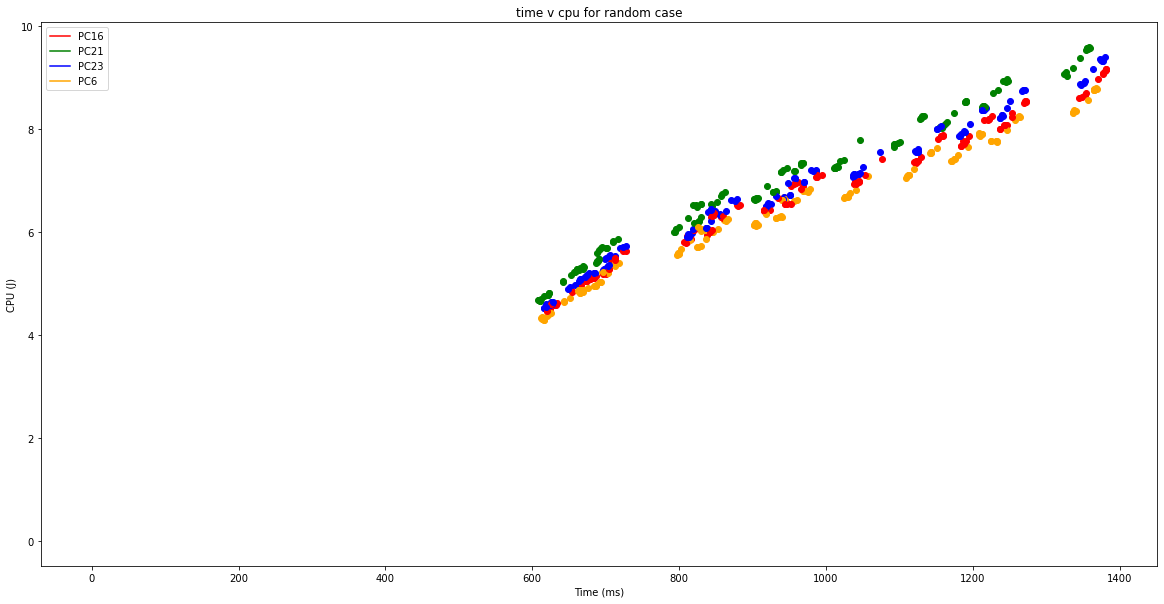

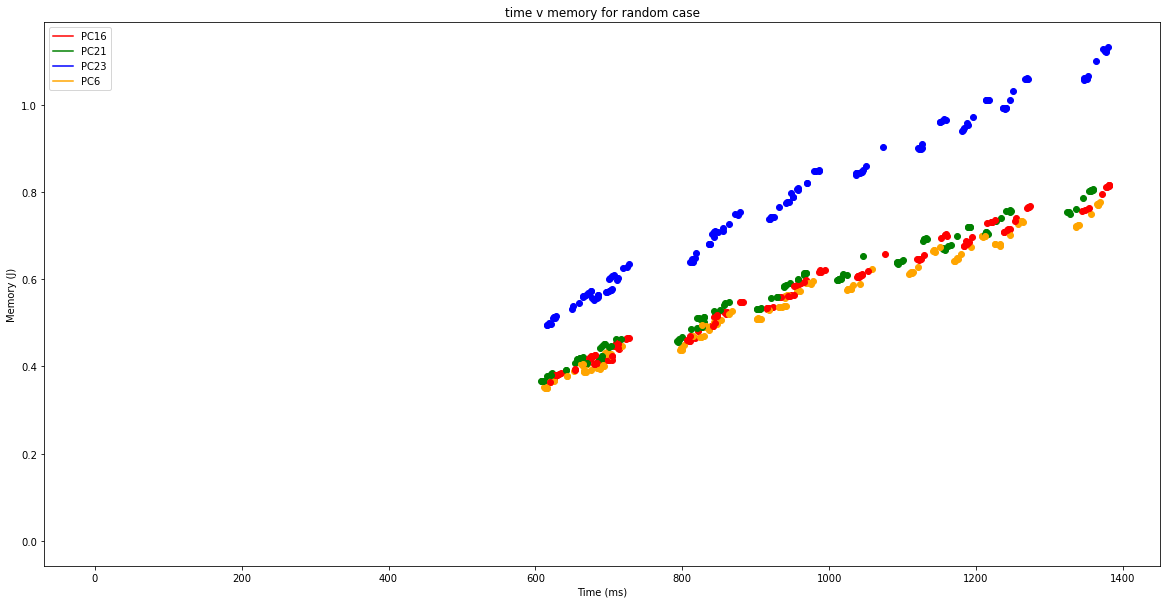

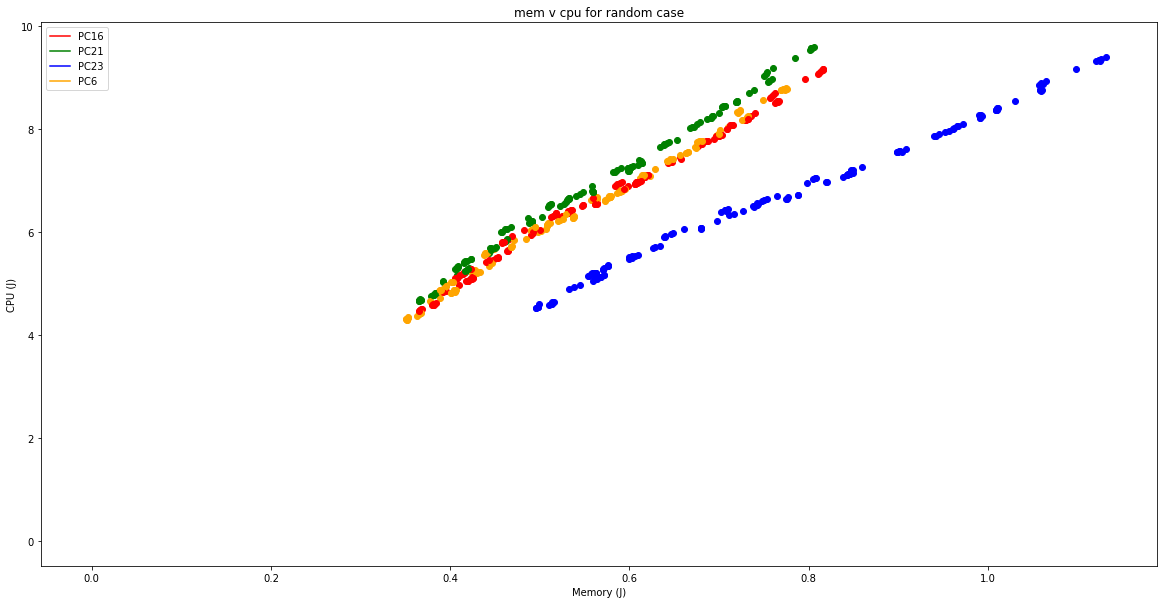

In [122]:
case = "random"
x = "Time (ms)"

plotRandDFs(x, "CPU (J)", listOfDF, case, colors, "time v cpu")
plotRandDFs(x, "Memory (J)", listOfDF, case, colors, "time v memory")
plotRandDFs("Memory (J)", "CPU (J)", listOfDF, case, colors, "mem v cpu")


# BEST

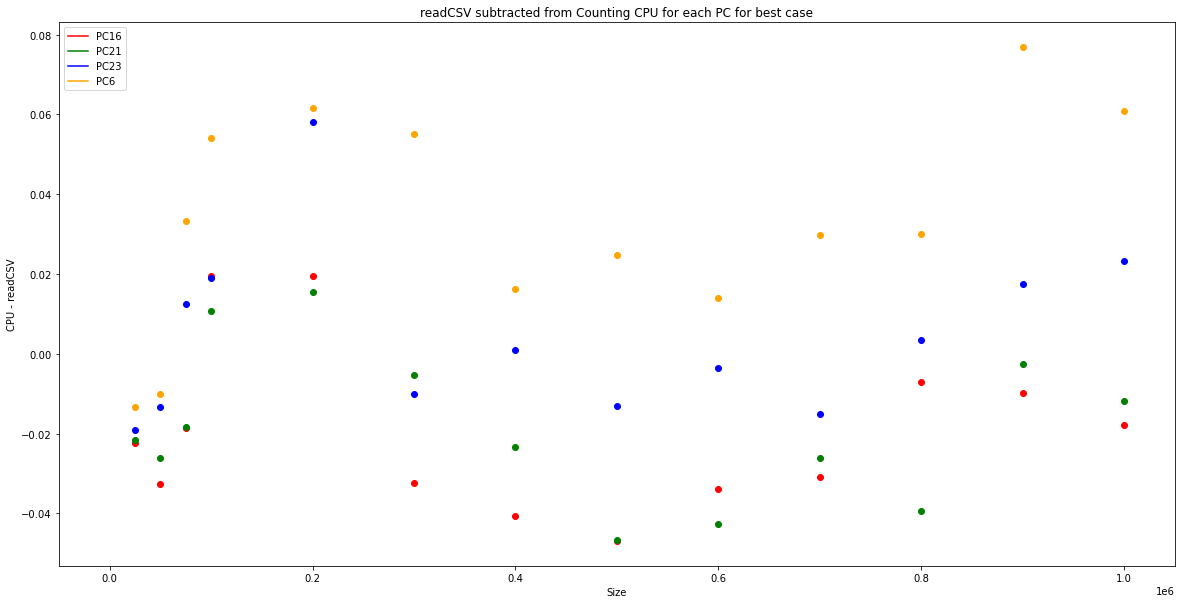

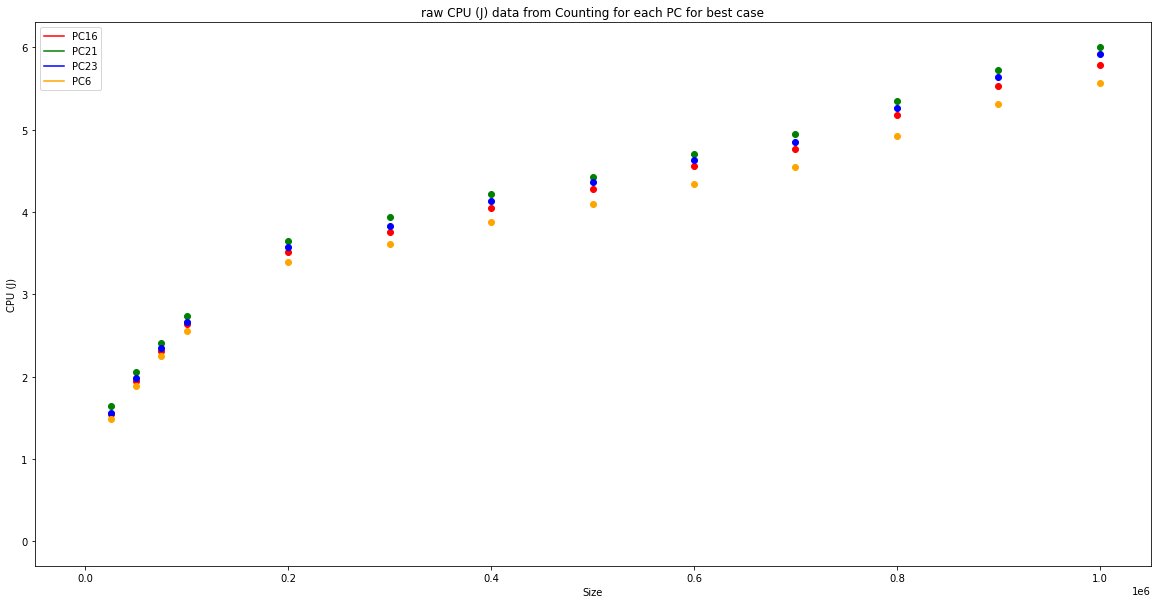

In [89]:

plotdfs("Size", "CPU - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting CPU for each PC")
plotdfs("Size", "CPU (J)", listOfDF, "best", colors, "raw CPU (J) data from Counting for each PC")


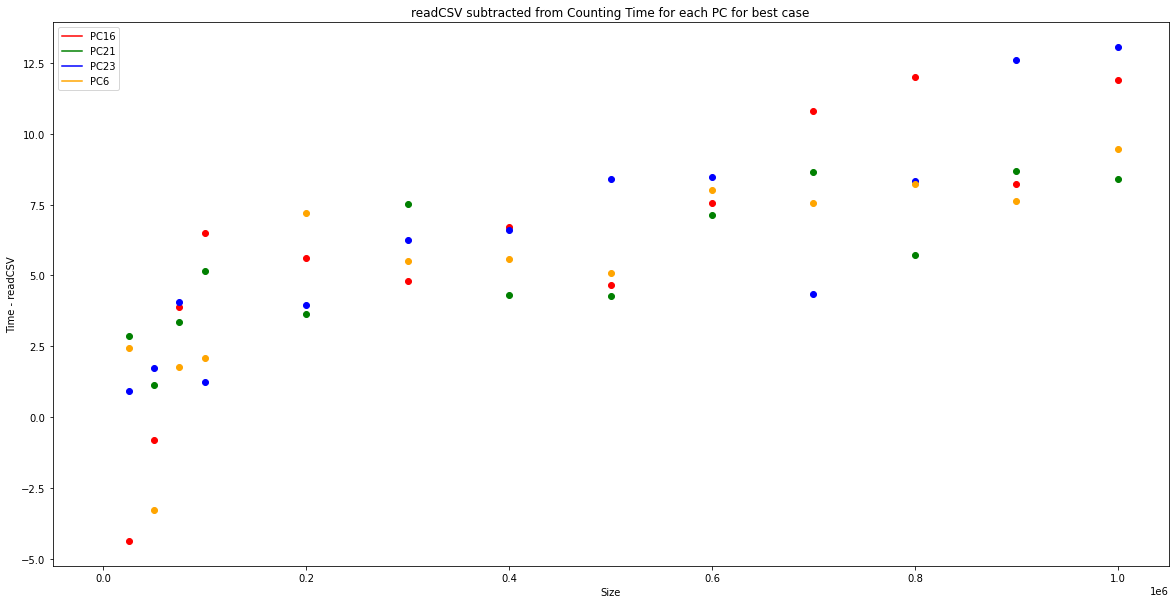

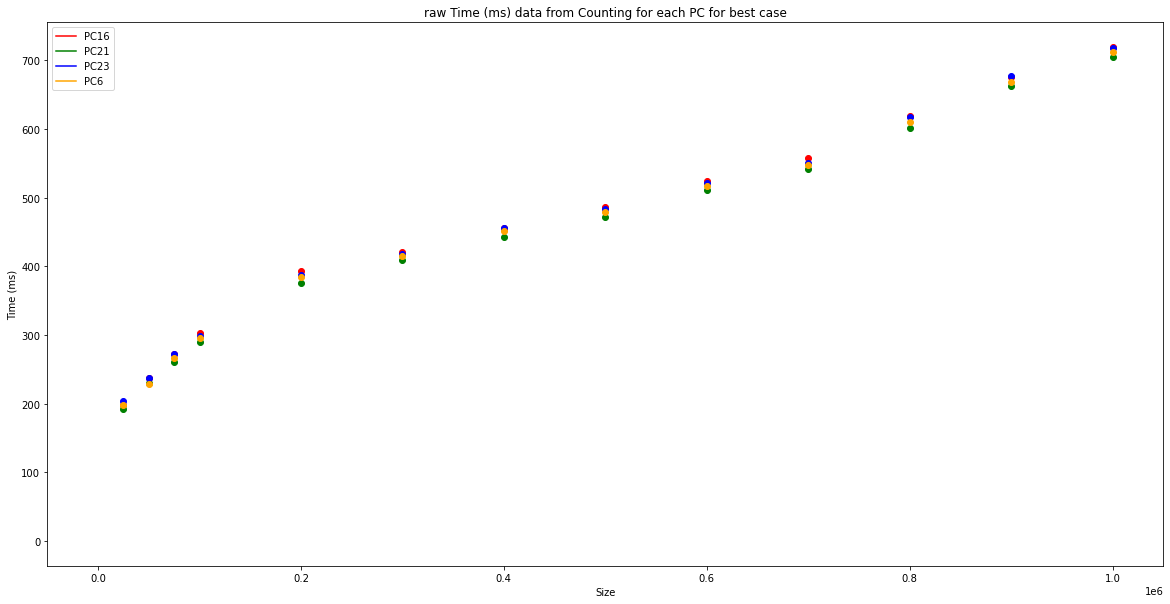

In [90]:
plotdfs("Size", "Time - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Time for each PC")
plotdfs("Size", "Time (ms)", listOfDF, "best", colors, "raw Time (ms) data from Counting for each PC")

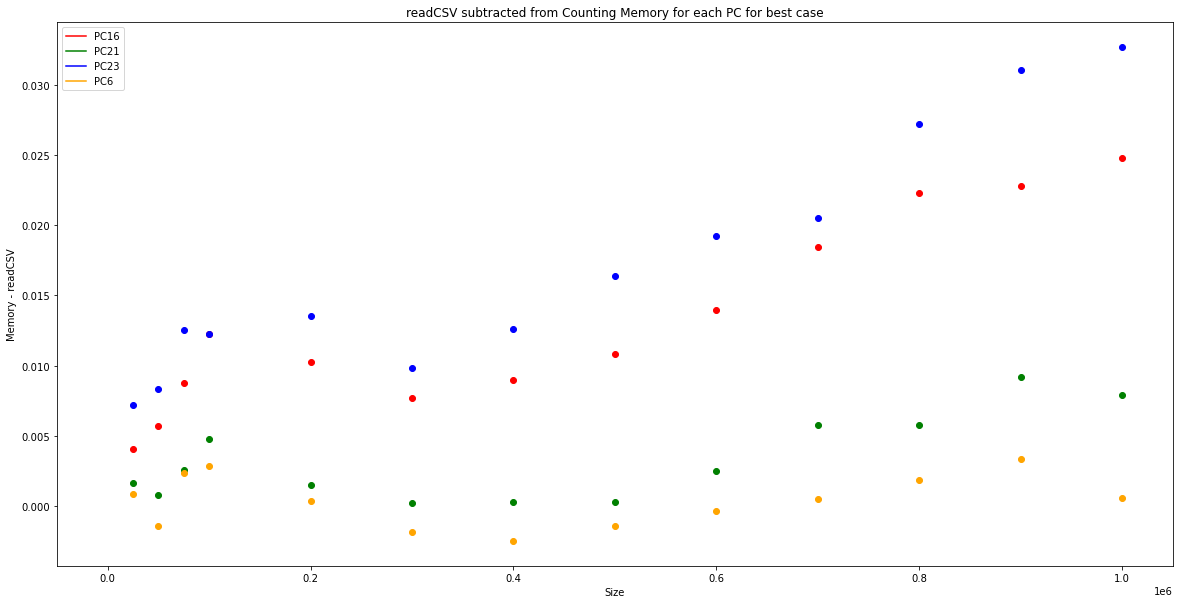

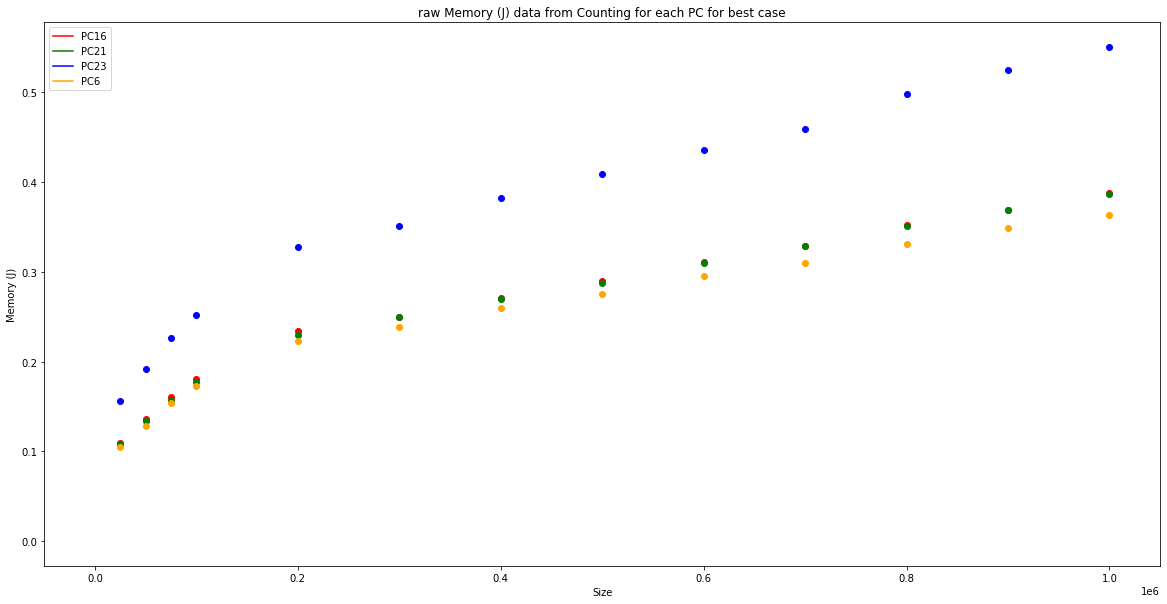

In [91]:
plotdfs("Size", "Memory - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Memory for each PC")
plotdfs("Size", "Memory (J)", listOfDF, "best", colors, "raw Memory (J) data from Counting for each PC")

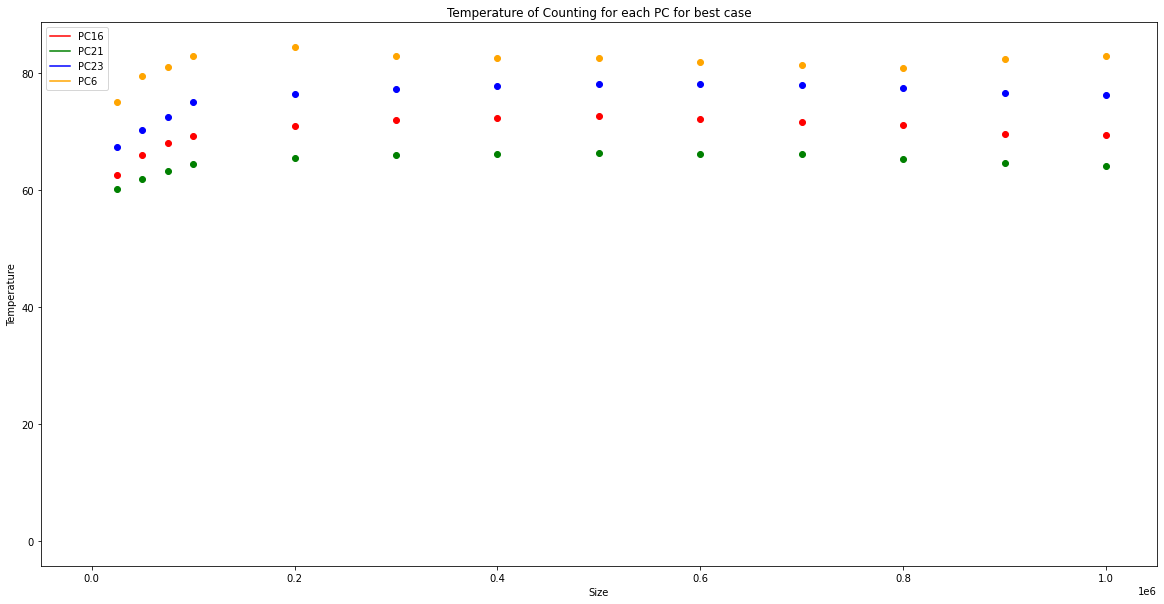

In [92]:
plotdfs("Size", "Temperature", listOfDF, "best", colors, "Temperature of Counting for each PC")

# WORST

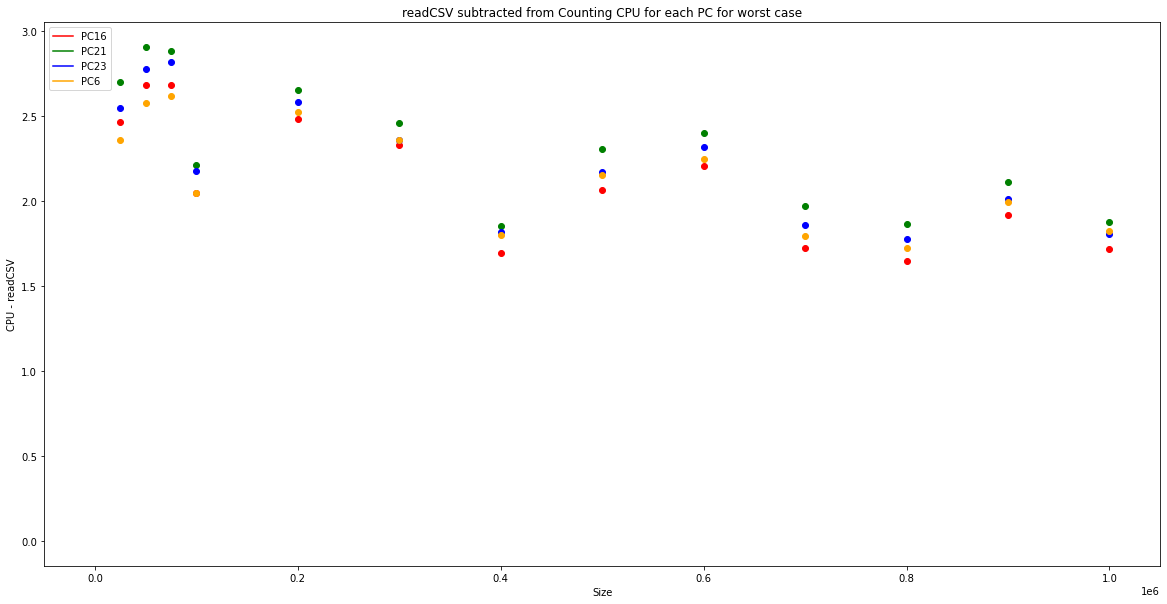

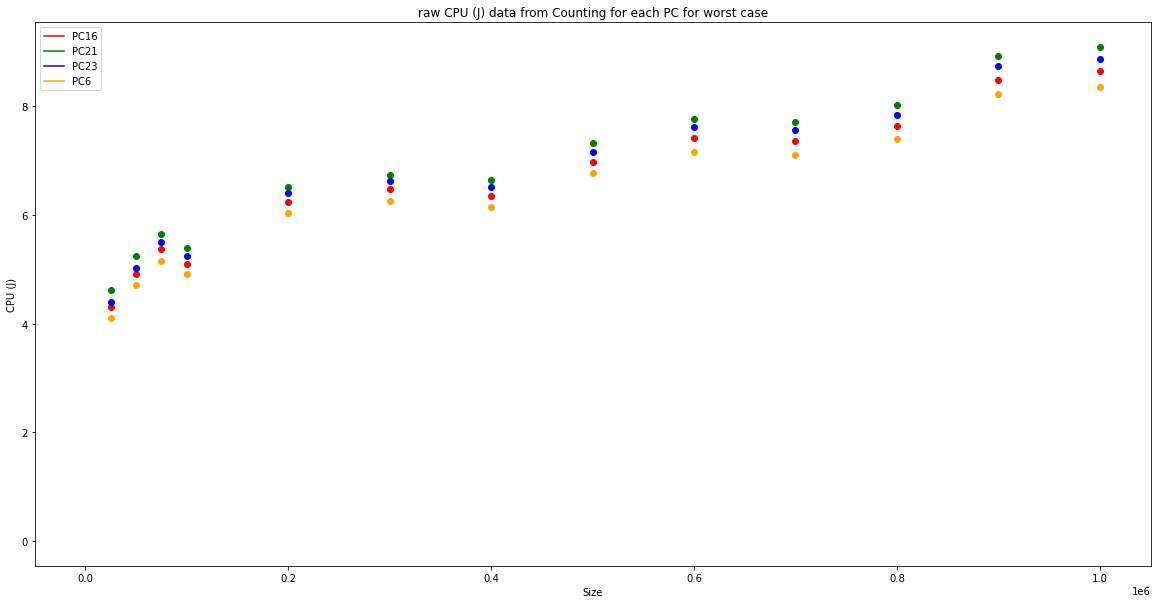

In [93]:
plotdfs("Size", "CPU - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting CPU for each PC")
plotdfs("Size", "CPU (J)", listOfDF, "worst", colors, "raw CPU (J) data from Counting for each PC")

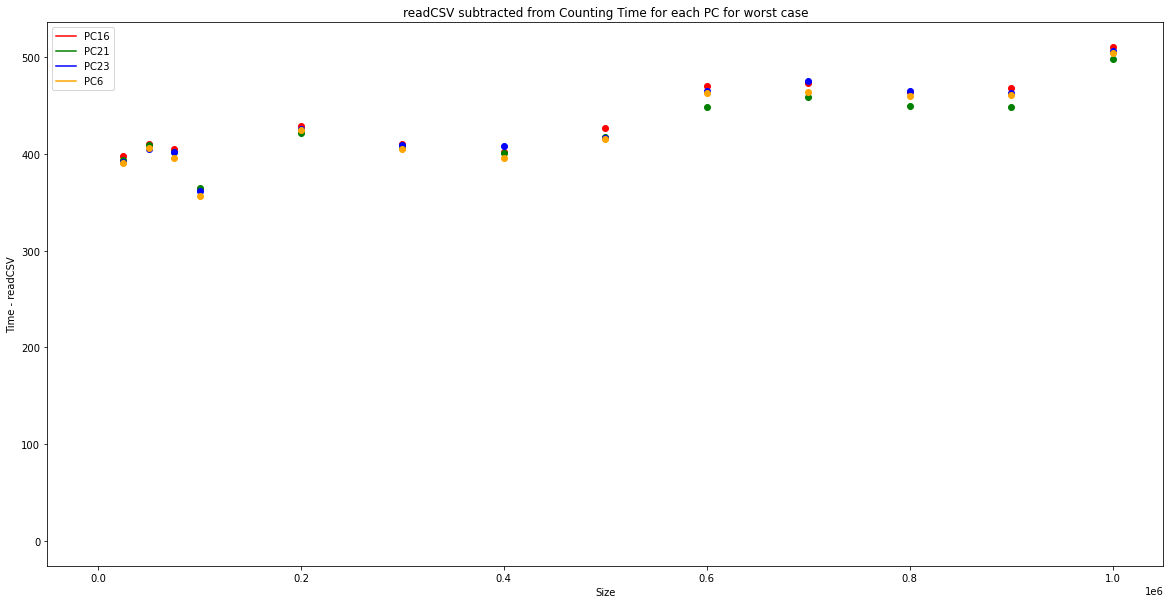

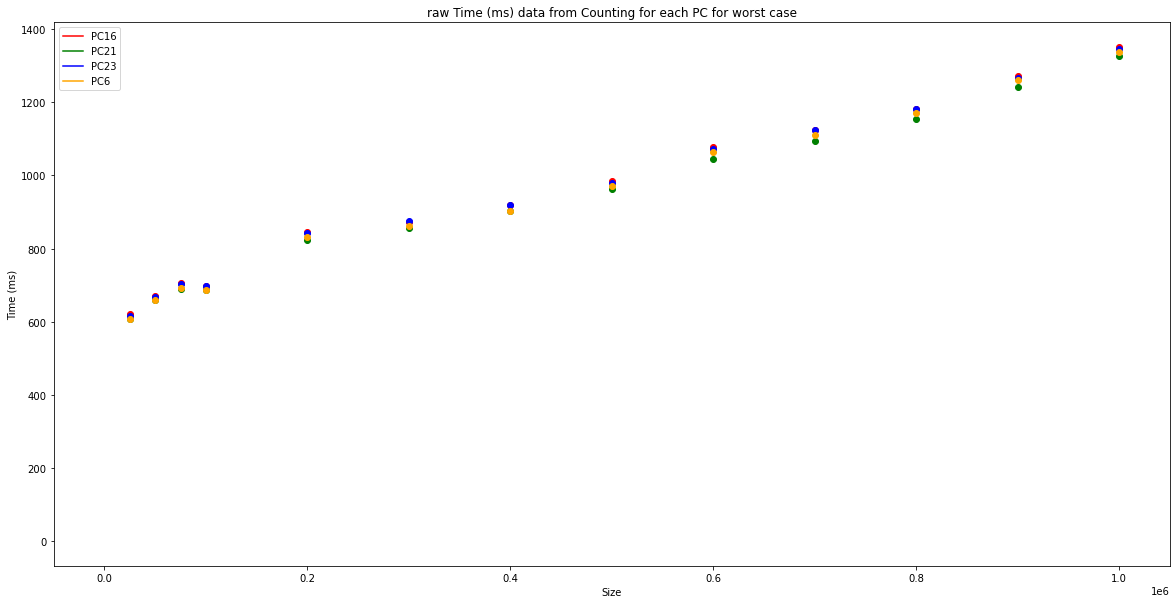

In [94]:
plotdfs("Size", "Time - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Time for each PC")
plotdfs("Size", "Time (ms)", listOfDF, "worst", colors, "raw Time (ms) data from Counting for each PC")

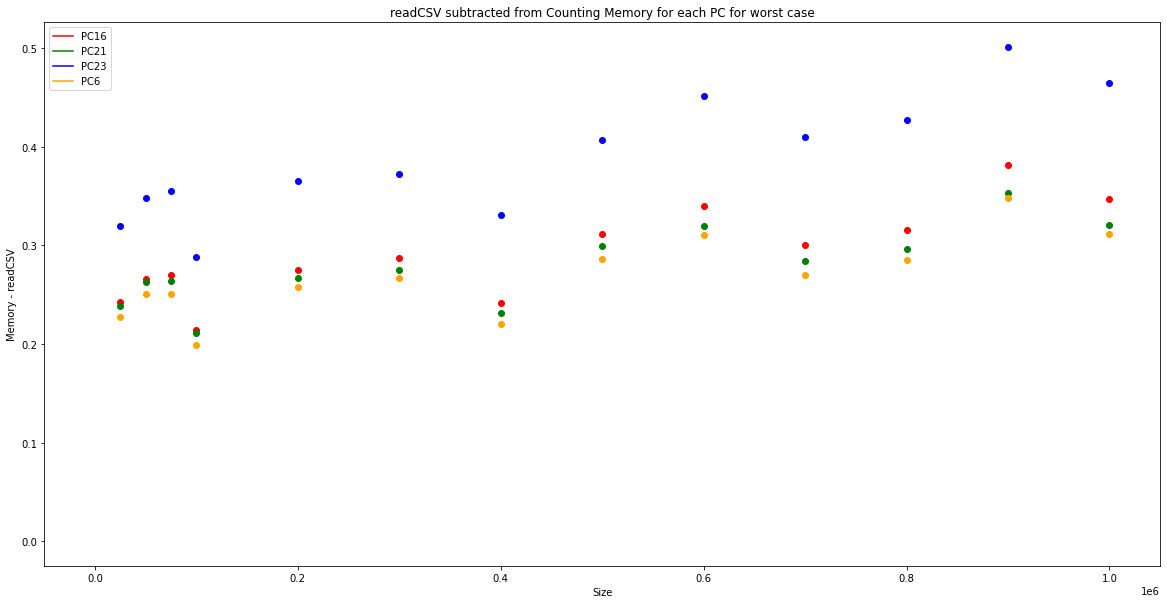

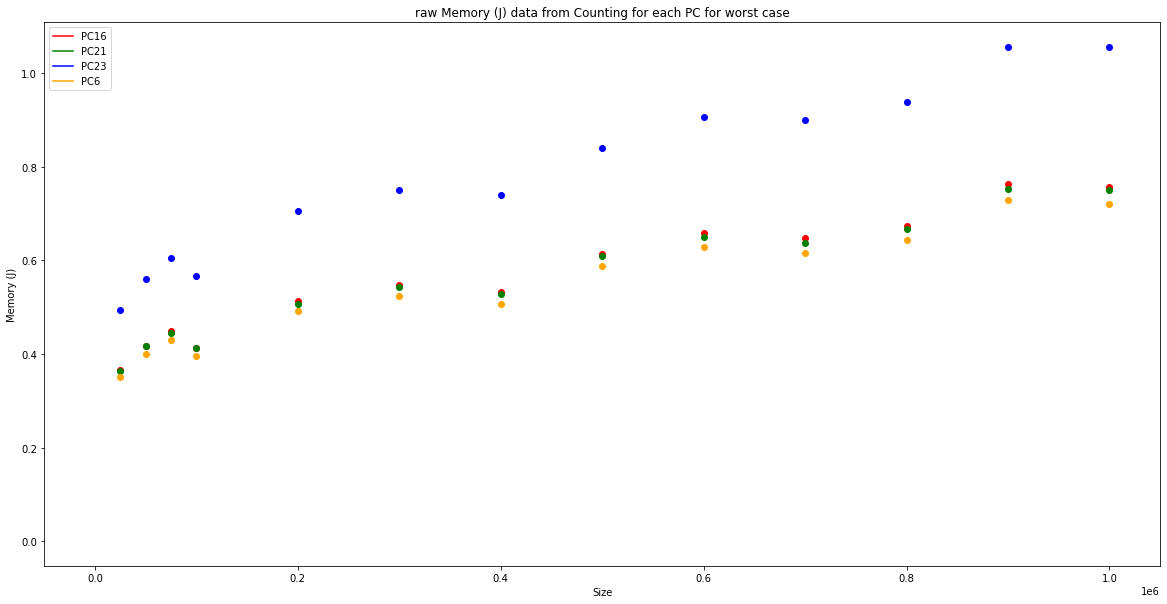

In [95]:
plotdfs("Size", "Memory - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Memory for each PC")
plotdfs("Size", "Memory (J)", listOfDF, "worst", colors, "raw Memory (J) data from Counting for each PC")

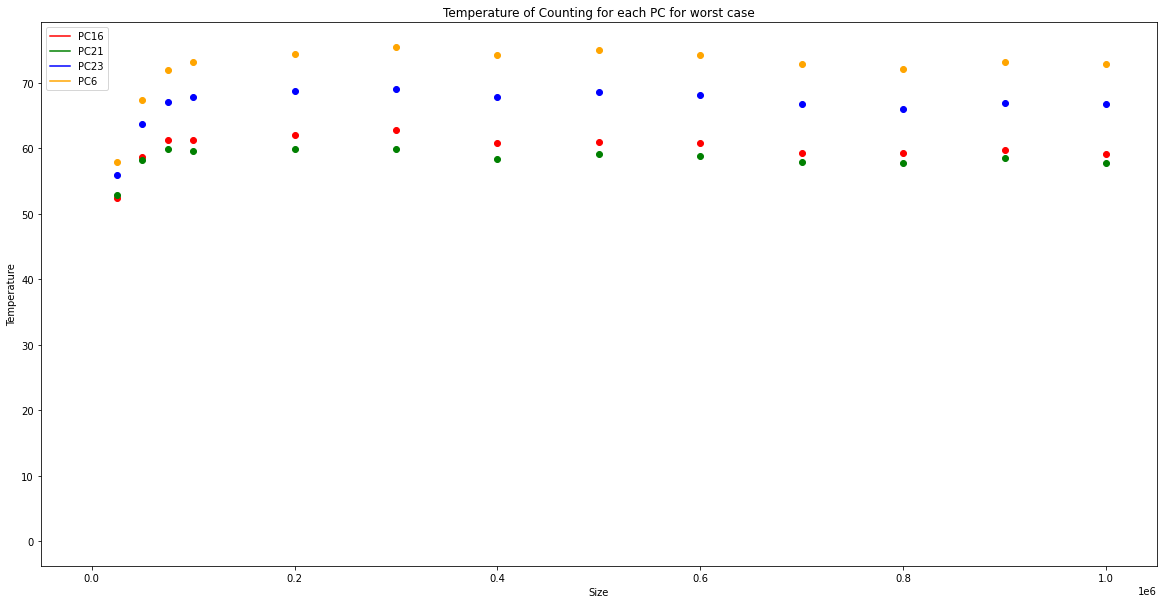

In [96]:
plotdfs("Size", "Temperature", listOfDF, "worst", colors, "Temperature of Counting for each PC")

# RANDOM

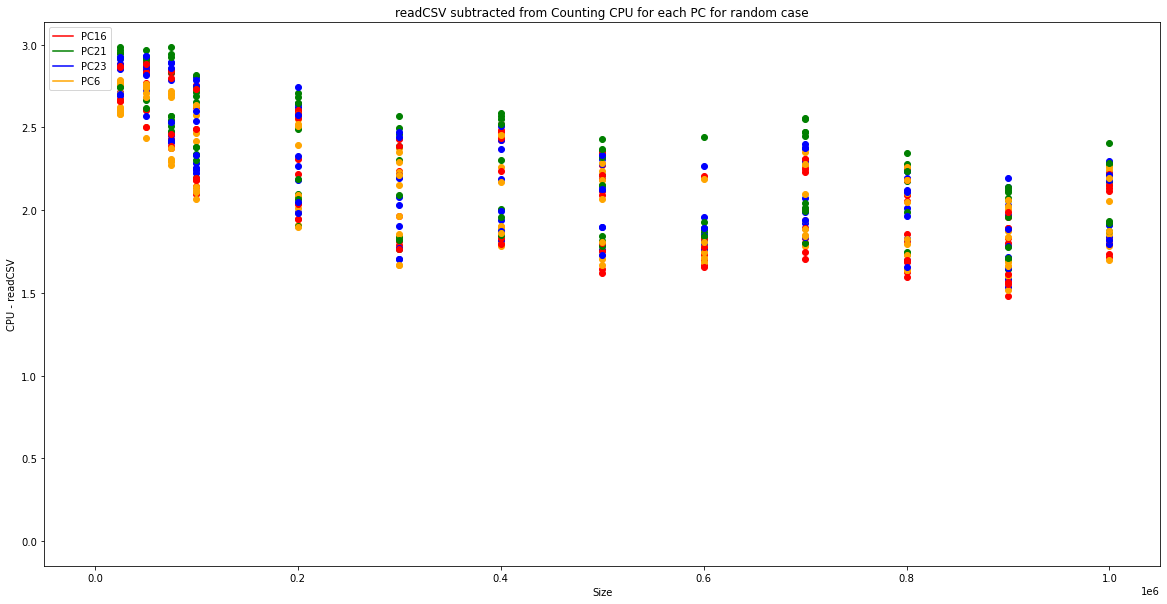

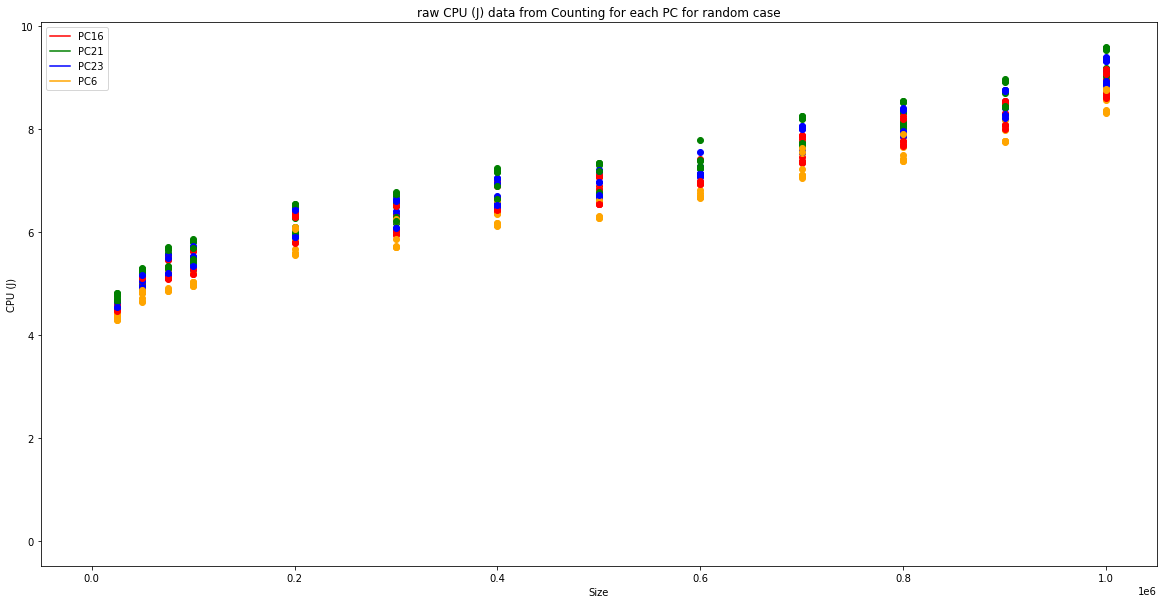

In [97]:

plotRandDFs("Size", "CPU - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting CPU for each PC")
plotRandDFs("Size", "CPU (J)", listOfDF, "random", colors, "raw CPU (J) data from Counting for each PC")


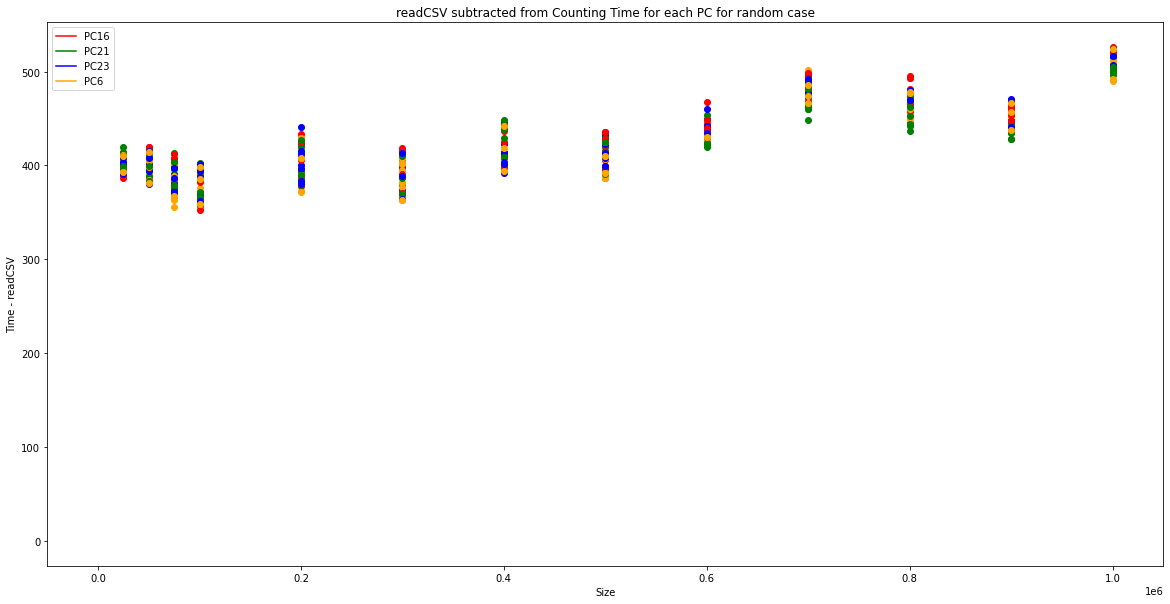

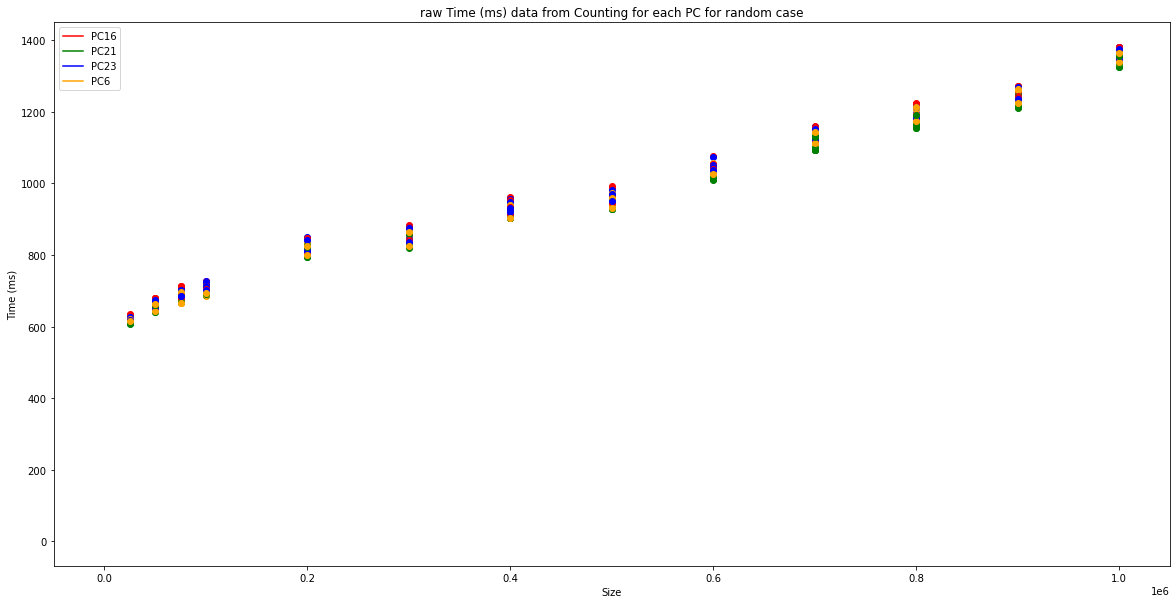

In [98]:

plotRandDFs("Size", "Time - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Time for each PC")
plotRandDFs("Size", "Time (ms)", listOfDF, "random", colors, "raw Time (ms) data from Counting for each PC")


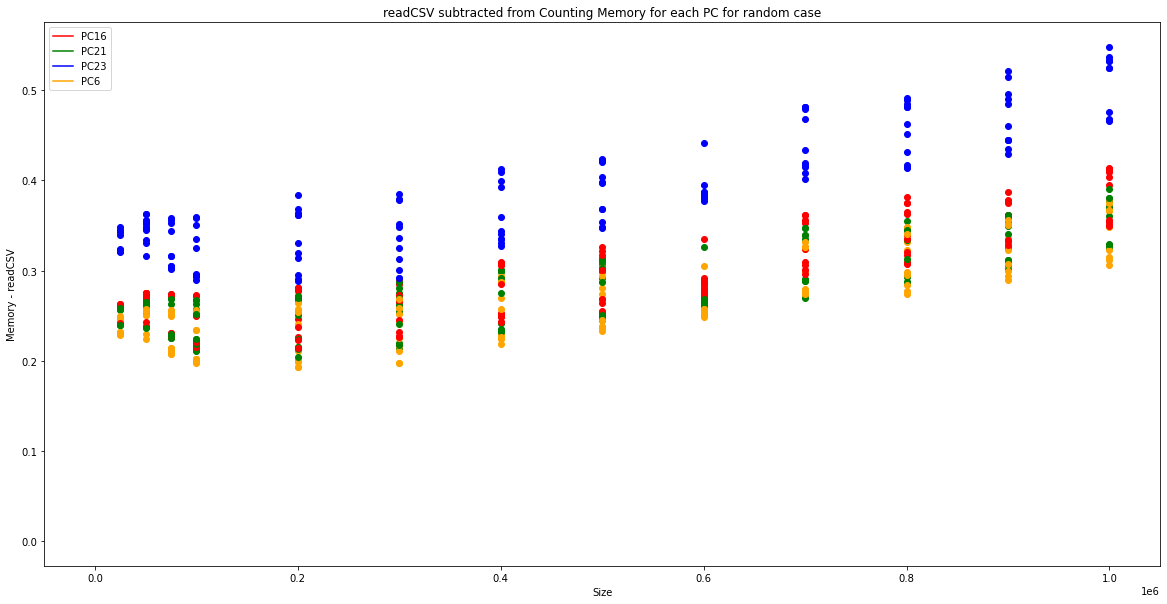

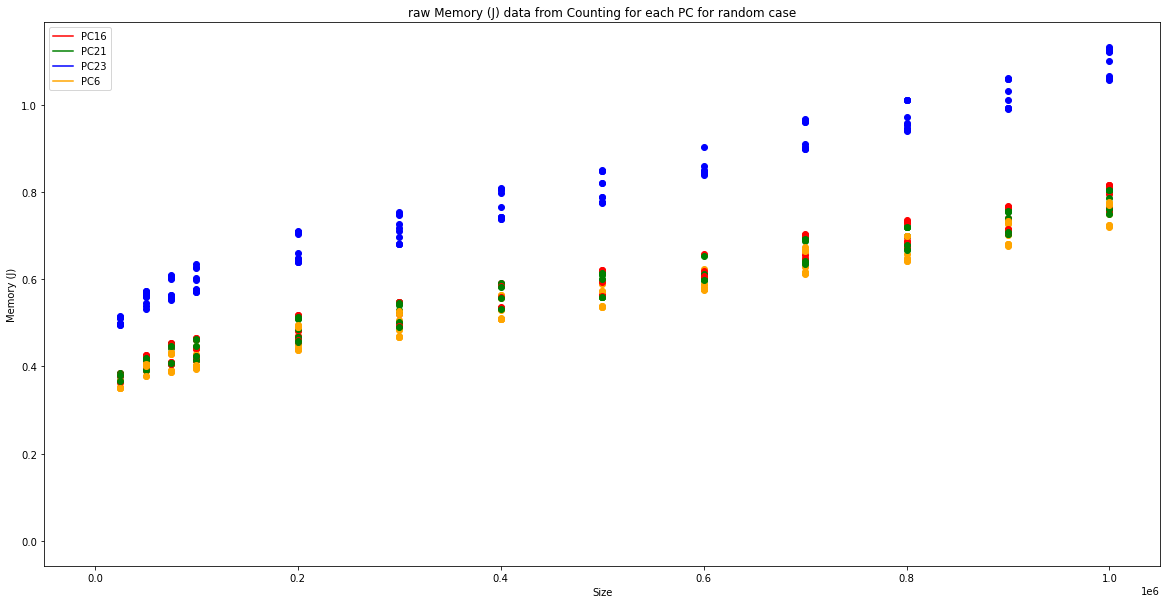

In [99]:

plotRandDFs("Size", "Memory - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Memory for each PC")
plotRandDFs("Size", "Memory (J)", listOfDF, "random", colors, "raw Memory (J) data from Counting for each PC")


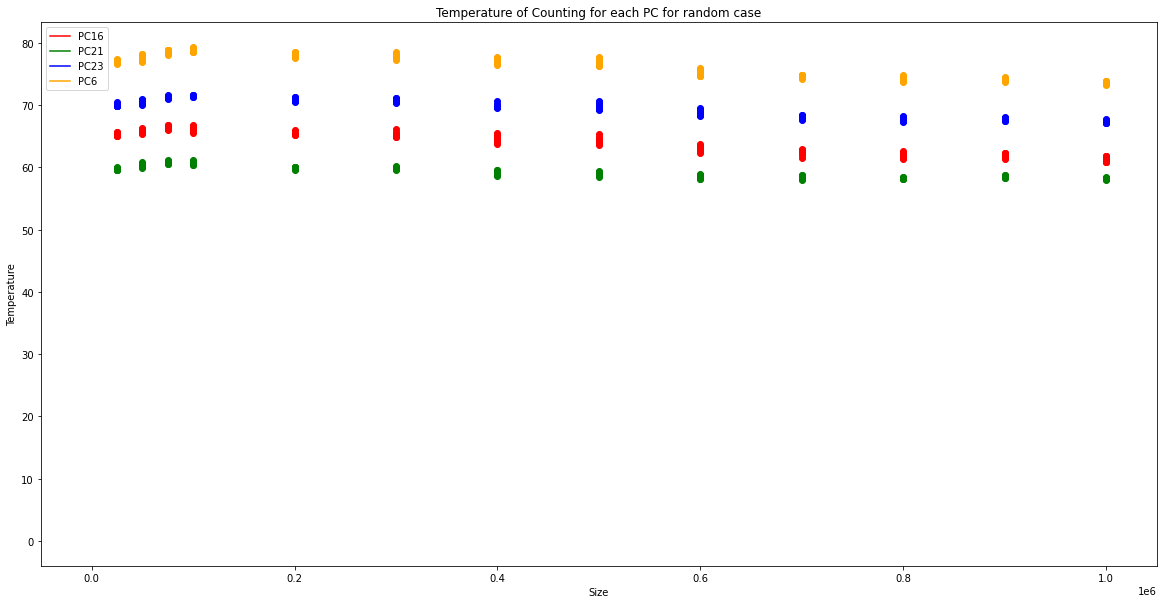

In [100]:

plotRandDFs("Size", "Temperature", listOfDF, "random", colors, "Temperature of Counting for each PC")
